In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

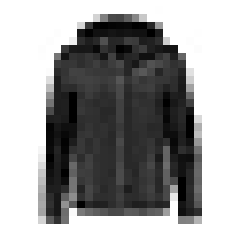

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

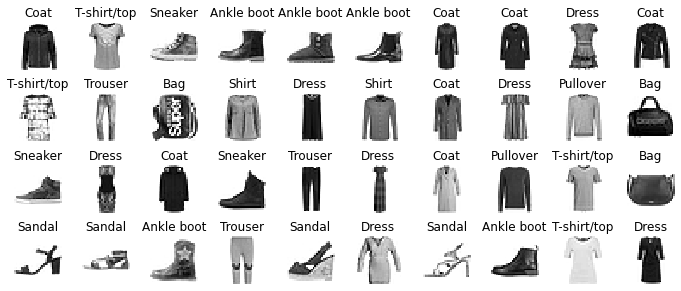

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [11]:
X_train, y_train = X_train.reshape(X_train.shape[0], 28*28), y_train
X_valid, y_valid = X_valid.reshape(X_valid.shape[0], 28*28), y_valid
X_test, y_test = X_test.reshape(X_test.shape[0], 28*28), y_test

In [12]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(300,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [13]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [14]:
weights

array([[-0.11316249,  0.12240592,  0.02548239, ...,  0.06690552,
        -0.11756593, -0.10791533],
       [-0.04865935, -0.07172084, -0.1039827 , ...,  0.07687827,
         0.00512777,  0.09911316],
       [-0.08430025, -0.07287755,  0.07666522, ...,  0.03718572,
         0.07244509, -0.09137038],
       ...,
       [ 0.09464314, -0.09332711, -0.05000901, ..., -0.10206282,
         0.06161761, -0.09052845],
       [ 0.11260941,  0.05882969, -0.04464415, ...,  0.08624656,
        -0.04763541, -0.10021398],
       [-0.03530341,  0.03177229,  0.04667286, ...,  0.12069152,
        -0.05523316, -0.07666002]], dtype=float32)

In [15]:
print(weights.shape)

(300, 100)


In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.9659 - accuracy: 0.4777 - val_loss: 1.5046 - val_accuracy: 0.6148
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2368 - accuracy: 0.6639 - val_loss: 1.0305 - val_accuracy: 0.7110
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9331 - accuracy: 0.7164 - val_loss: 0.8332 - val_accuracy: 0.7380
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7878 - accuracy: 0.7370 - val_loss: 0.7266 - val_accuracy: 0.7526
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7079 - accuracy: 0.7493 - val_loss: 0.6659 - val_accuracy: 0.7622
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6598 - accuracy: 0.7599 - val_loss: 0.6275 - val_accuracy: 0.7776
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6264 - accuracy: 0.7696 - val_loss: 0.5952 - val_accuracy:

In [19]:
history.params

{'epochs': 10, 'steps': 1719, 'verbose': 1}

In [20]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

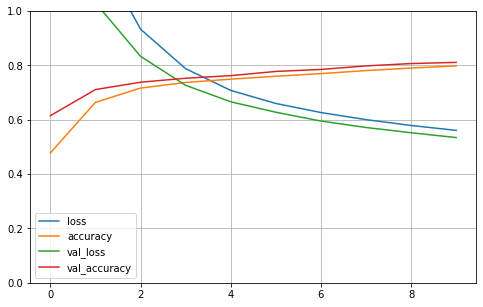

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5712 - accuracy: 0.7919


[0.5712399482727051, 0.7918999791145325]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.28, 0.01, 0.5 ],
       [0.  , 0.  , 0.8 , 0.  , 0.04, 0.  , 0.15, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_on_batch(X_new)
y_pred = y_pred.argmax(axis=1)
y_pred

array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

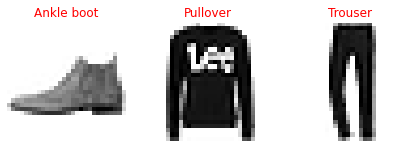

In [29]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image.reshape([28,28]), cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12, color="red")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()